In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_table('auto-mpg.data', header=None)
cars['Name']=cars[1]
cars = cars.drop(columns = [1])

# 'auto-mpg.data' read into a dataframe

In [3]:
cars

,0,Name
0,18.0 8 307.0 130.0 3504. 12...,chevrolet chevelle malibu
1,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
2,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
3,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
4,17.0 8 302.0 140.0 3449. 10...,ford torino
...,...,...
393,27.0 4 140.0 86.00 2790. 15...,ford mustang gl
394,44.0 4 97.00 52.00 2130. 24...,vw pickup
395,32.0 4 135.0 84.00 2295. 11...,dodge rampage
396,28.0 4 120.0 79.00 2625. 18...,ford ranger


# 'auto-mpg(1).names' looped into the dataframe to name the columns

In [4]:
mpg = []
cylinders = []
displacement = []
horsepower = []
weight = []
acceleration = []
model_year = []
origin = []

for i in range(len(cars)):
    split = cars[0][i].split(' ')
    new = [item for item in split if item]
    mpg.append(new[0])
    cylinders.append(new[1])
    displacement.append(new[2])
    horsepower.append(new[3])
    weight.append(new[4])
    acceleration.append(new[5])
    model_year.append(new[6])
    origin.append(new[7])

In [5]:
cars['mpg'] = mpg
cars['cylinders'] = cylinders
cars['displacement'] = displacement
cars['horsepower'] = horsepower
cars['weight'] = weight
cars['acceleration'] = acceleration
cars['model_year'] = model_year
cars['origin'] = origin

# Dropping useless columns

In [6]:
cars=cars.drop(columns=[0])

In [7]:
cars

,Name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436.,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433.,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449.,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.00,2790.,15.6,82,1
394,vw pickup,44.0,4,97.00,52.00,2130.,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.00,2295.,11.6,82,1
396,ford ranger,28.0,4,120.0,79.00,2625.,18.6,82,1


# Checking for Null values

In [8]:
cars.isna().sum()

Name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

# Locating the '?' in horsepower and replacing them with None

In [10]:
cars.loc[cars['horsepower'] == '?']

,Name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,ford pinto,25.0,4,98.00,?,2046.,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875.,17.0,74,1
330,renault lecar deluxe,40.9,4,85.00,?,1835.,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905.,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320.,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035.,20.5,82,1


In [16]:
cars = cars.replace('?', None)

In [17]:
cars.loc[cars['horsepower'] == '?']

,Name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin


# Replacing the origin numbers with their respective country names

In [18]:
cars["origin"].replace({"1": "USA", "2": "ASIA", "3": "EUROPE"}, inplace=True)

In [19]:
cars

,Name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.,12.0,70,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436.,11.0,70,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433.,12.0,70,USA
4,ford torino,17.0,8,302.0,140.0,3449.,10.5,70,USA
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.00,2790.,15.6,82,USA
394,vw pickup,44.0,4,97.00,52.00,2130.,24.6,82,ASIA
395,dodge rampage,32.0,4,135.0,84.00,2295.,11.6,82,USA
396,ford ranger,28.0,4,120.0,79.00,2625.,18.6,82,USA


# Bar chart for cylinders

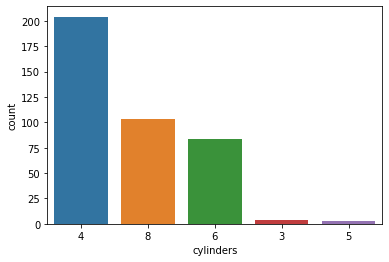

In [58]:
sns.countplot(x = cars['cylinders'], order = cars['cylinders'].value_counts().index)

# Showing a scatter plot for the relationship of horsepower and weight

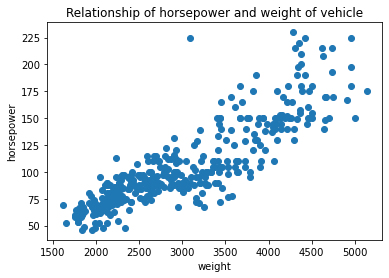

In [140]:
horsepower = pd.to_numeric(cars['horsepower'])
weight = cars['weight']

plt.plot(weight, horsepower,'o')
plt.title('Relationship of horsepower and weight of vehicle')
plt.xlabel('weight')
plt.ylabel('horsepower')
plt.show()